In [76]:
import rootpy
import tensorflow as tf
import keras
import numpy as np

In [18]:
import uproot

In [163]:
arrays = uproot.open("input.root")['tree'].arrays(['H_pt',
                          'H_mass',
                          'V_pt',
                          'hJets_btagCSV_1',
                          'hJets_btagCSV_0',
                          'Top1_mass_fromLepton_regPT_w4MET',                       
                          'V_mt',
                          'met_pt'    
                            ])

In [164]:
labels = uproot.open("input.root")['tree'].arrays(['sig'])

In [182]:
Xs = []
for i in arrays:
    Xs.append(arrays[i])
Xs = np.array(Xs).transpose()
Ys = labels['sig']
#Ys = Ys.transpose()
print Xs.shape
print Ys.shape

(647064, 8)
(647064,)


In [203]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(Xs, Ys, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

In [204]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [220]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [221]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [238]:
# Fit the model
model.fit(X_train, y_train, epochs=30, batch_size=500, validation_split=0.2)

Train on 346825 samples, validate on 86707 samples
Epoch 1/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2218 - acc: 0.9195 - val_loss: 0.2225 - val_acc: 0.9197
Epoch 2/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2214 - acc: 0.9196 - val_loss: 0.2222 - val_acc: 0.9196
Epoch 3/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2216 - acc: 0.9194 - val_loss: 0.2212 - val_acc: 0.9194
Epoch 4/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2210 - acc: 0.9198 - val_loss: 0.2243 - val_acc: 0.9182
Epoch 5/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2213 - acc: 0.9196 - val_loss: 0.2241 - val_acc: 0.9177
Epoch 6/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2209 - acc: 0.9198 - val_loss: 0.2246 - val_acc: 0.9186
Epoch 7/30
346825/346825 [==============================] - 1s 4us/step - loss: 0.2210 - acc: 0.9196 - val_loss: 0.2239 -

In [239]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

213532/213532 [==============================] - 4s 20us/step

acc: 92.15%


In [240]:
predictions = model.predict(X_test)

In [241]:
print len(predictions), len(y_test)

213532 213532


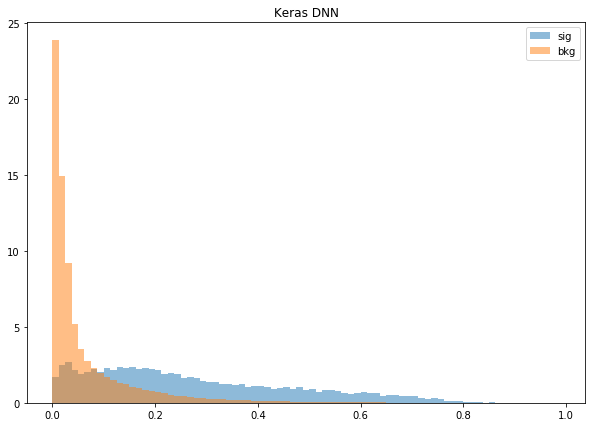

In [245]:
plt.figure(figsize=(10,7))
bins = np.arange(0,1,1/80.)
#plt.semilogy()
plt.hist(predictions, bins=bins, weights=y_test, alpha=0.5, normed=True, label="sig")
plt.hist(predictions, bins=bins, weights=1-y_test, alpha=0.5, normed=True, label="bkg")
plt.title("Keras DNN")
plt.legend()
plt.show()

In [243]:
from sklearn.metrics import roc_curve, auc

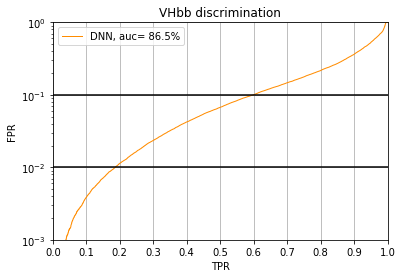

In [247]:
fpr, tpr, threshold = roc_curve(y_test, predictions)
plt.plot(tpr, fpr, lw=1, label="DNN, auc= %.1f%%"%(auc(fpr,tpr)*100), c='darkorange')
plt.xlim(0,1)
plt.ylim(0.001,1)
plt.title("VHbb discrimination")
plt.axhline(0.1, c='black')
plt.axhline(0.01, c='black')
plt.xticks(np.arange(0,1.1,0.1))
plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.grid()
plt.semilogy()
plt.show()